In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

In [103]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
class DataLoaderPreprocessor:
    def __init__(self, csv_path, target_col, test_size=0.2, batch_size=32, window_size=50):
        self.csv_path = csv_path
        self.target_col = target_col
        self.test_size = test_size
        self.batch_size = batch_size
        self.window_size = window_size
        self.scaler = None

    def create_sequences(self, data, target, window_size):
        """Create input sequences and corresponding target values."""
        sequences = []
        targets = []
        for i in range(len(data) - window_size):
            seq = data[i : i + window_size]
            label = target[i + window_size]
            sequences.append(seq)
            targets.append(label)
        return torch.tensor(sequences, dtype=torch.float32), torch.tensor(targets, dtype=torch.float32).view(-1, 1)

    def test_load(self):
        data = pd.read_csv(self.csv_path)
        data['Datetime'] = pd.to_datetime(data['Datetime'])
        data.sort_values(by='Datetime', inplace=True)  # Ensure data is sorted by datetime
        data.ffill(inplace=True)
        data.bfill(inplace=True)

        feature_columns = [col for col in data.columns if col not in [self.target_col, 'Datetime', 'Delta_Target']]
        X = data[feature_columns].values
        y = data[self.target_col].values

        # Scale features
        scaler = MinMaxScaler(feature_range=(0, 1))
        X = scaler.fit_transform(X)
        X, y = self.create_sequences(X, y, self.window_size)
        test_data = torch.utils.data.TensorDataset(X, y)
        test_loader = torch.utils.data.DataLoader(test_data, batch_size=self.batch_size, shuffle=False)
  
        return test_loader, X.shape[2], data["Datetime"][50:]  # Return the number of features as input dimension


    def load_and_preprocess(self):
        """Load and preprocess data."""
        data = pd.read_csv(self.csv_path)
        data['Datetime'] = pd.to_datetime(data['Datetime'])
        data.sort_values(by='Datetime', inplace=True)  # Ensure data is sorted by datetime
        data.ffill(inplace=True)
        data.bfill(inplace=True)

        feature_columns = [col for col in data.columns if col not in [self.target_col, 'Datetime', 'Delta_Target']]
        X = data[feature_columns].values
        y = data[self.target_col].values

        # Scale features
        scaler = MinMaxScaler(feature_range=(0, 1))
        X = scaler.fit_transform(X)

        # Create sequences
        X, y = self.create_sequences(X, y, self.window_size)

        # Split into training and testing datasets
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, shuffle=False
        )
        train_data = torch.utils.data.TensorDataset(X_train, y_train)
        test_data = torch.utils.data.TensorDataset(X_test, y_test)

        train_loader = torch.utils.data.DataLoader(train_data, batch_size=self.batch_size, shuffle=False)
        test_loader = torch.utils.data.DataLoader(test_data, batch_size=self.batch_size, shuffle=False)
   
        return train_loader, test_loader, X.shape[2]  # Return the number of features as input dimension


In [263]:
class TestDataLoaderPreprocessor:
    def __init__(self, csv_path, target_col, test_size=0, batch_size=32, window_size=50):
        self.csv_path = csv_path
        self.target_col = target_col
        self.test_size = test_size
        self.batch_size = batch_size
        self.window_size = window_size
        self.scaler = None

    def create_sequences(self, data, target, window_size):
        """Create input sequences and corresponding target values."""
        sequences = []
        targets = []
        for i in range(len(data) - window_size):
            seq = data[i : i + window_size]
            label = target[i + window_size]
            sequences.append(seq)
            targets.append(label)
        return torch.tensor(sequences, dtype=torch.float32), torch.tensor(targets, dtype=torch.float32).view(-1, 1)

    def test_load(self):
        data = pd.read_csv(self.csv_path)
        data['Datetime'] = pd.to_datetime(data['Datetime'])
        data.sort_values(by='Datetime', inplace=True)  # Ensure data is sorted by datetime
        data.ffill(inplace=True)
        data.bfill(inplace=True)

        feature_columns = [col for col in data.columns if col not in [self.target_col, 'Datetime', 'Delta_Target']]
        X = data[feature_columns].values
        y = data[self.target_col].values

        # Scale features
        scaler = MinMaxScaler(feature_range=(0, 1))
        X = scaler.fit_transform(X)
        X, y = self.create_sequences(X, y, self.window_size)
        test_data = torch.utils.data.TensorDataset(X, y)
        test_loader = torch.utils.data.DataLoader(test_data, batch_size=self.batch_size, shuffle=False)
  
        return test_loader, X.shape[2], data["Datetime"][50:]  # Return the number of features as input dimension


    def load_and_preprocess(self):
        """Load and preprocess data."""
        data = pd.read_csv(self.csv_path)
        data['Datetime'] = pd.to_datetime(data['Datetime'])
        data.sort_values(by='Datetime', inplace=True)  # Ensure data is sorted by datetime
        data.ffill(inplace=True)
        data.bfill(inplace=True)

        feature_columns = [col for col in data.columns if col not in [self.target_col, 'Datetime', 'Delta_Target']]
        X = data[feature_columns].values
        y = data[self.target_col].values

        # Scale features
        scaler = MinMaxScaler(feature_range=(0, 1))
        X = scaler.fit_transform(X)

        # Create sequences
        X, y = self.create_sequences(X, y, self.window_size)

        # Split into training and testing datasets
        # X_train, X_test, y_train, y_test = train_test_split(
        #     X, y, test_size=self.test_size, shuffle=False
        # )
        train_data = torch.utils.data.TensorDataset(X, y)
        test_data = torch.utils.data.TensorDataset(X, y)

        train_loader = torch.utils.data.DataLoader(train_data, batch_size=self.batch_size, shuffle=False)
        test_loader = torch.utils.data.DataLoader(test_data, batch_size=self.batch_size, shuffle=False)
   
        return train_loader, test_loader, X.shape[2]  # Return the number of features as input dimension


In [235]:
# class StockLSTM(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, num_layers):
#         super(StockLSTM, self).__init__()
        
#         # LSTM layer
#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        
#         # Fully connected layer
#         self.fc = nn.Linear(hidden_size, output_size)
    
#     def forward(self, x):
#         # Ensure the input is of the correct shape (batch_size, sequence_length, input_size)
#         batch_size, seq_len, _ = x.size()
        
#         # Pass through LSTM layer
#         lstm_out, (hn, cn) = self.lstm(x)
        
#         # Use the last hidden state for prediction
#         last_hidden_state = lstm_out[:, -1, :]  # Last time step's output
        
#         # Fully connected layer to output the prediction
#         out = self.fc(last_hidden_state)
        
#         return out

class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout=0.2):
        super(StockLSTM, self).__init__()
        
        # LSTM layer with dropout
        self.lstm = nn.LSTM(
            input_size, hidden_size, num_layers, 
            batch_first=True, dropout=dropout
        )
        
        # Fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Pass through LSTM layer
        lstm_out, (hn, cn) = self.lstm(x)
        
        # Use the last hidden state for prediction
        last_hidden_state = lstm_out[:, -1, :]  # Last time step's output
        
        # Fully connected layer to output the prediction
        out = self.fc(last_hidden_state)
        return out


In [279]:
csv_path = 'Dataset/INFY_DATA.csv'
target_col = 'Target'  # Replace with your actual target column name
preprocessor = DataLoaderPreprocessor(csv_path, target_col, test_size=0.2, batch_size=32, window_size=50)
train_loader, test_loader, input_size = preprocessor.load_and_preprocess()

In [280]:
# Model initialization
hidden_size = 64  # You can experiment with this
output_size = 1  # Predicting one value (the next day's price)
num_layers = 1 # Number of LSTM layers

model = StockLSTM(input_size, hidden_size, output_size, num_layers)
model = model.to(device)
print(model)

StockLSTM(
  (lstm): LSTM(19, 64, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


e:\Projects\ML-Fall-24-Project\v_ml_env\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


In [281]:
# Hyperparameters
epochs = 300
learning_rate = 0.01
patience = 150  # Early stopping patience

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Early stopping variables
best_val_loss = float('inf')
early_stop_counter = 0

training_loss = []

# Training loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    epoch_loss = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)
        # Zero the gradients

        optimizer.zero_grad()
        
        # Forward pass
        output = model(data)
        
        # Compute loss
        loss = criterion(output.squeeze(), target)
        rmse_loss = torch.sqrt(loss)

        # Backward pass and optimization
        rmse_loss.backward()
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()
        
        epoch_loss += rmse_loss.item()
        
    
    avg_epoch_loss = epoch_loss / len(train_loader)
    training_loss.append(avg_epoch_loss)
    
    # Validation phase
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output.squeeze(), target)
            rmse_loss = torch.sqrt(loss)
            val_loss += rmse_loss.item()
    avg_val_loss = val_loss / len(test_loader)
    print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {avg_epoch_loss:.4f} | Val Loss: {avg_val_loss:.4f}")
    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        early_stop_counter = 0
        # Save the model's best state
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping triggered. Training halted.")
            break

   

e:\Projects\ML-Fall-24-Project\v_ml_env\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
e:\Projects\ML-Fall-24-Project\v_ml_env\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
e:\Projects\ML-Fall-24-Project\v_ml_env\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([13, 1])) that is different to the input size (torch.Size([13])). This will likely lead to incorrect results due to broadcasting. Please ensu

Epoch [1/300] | Train Loss: 1782.9086 | Val Loss: 1808.6791
Epoch [2/300] | Train Loss: 1686.1679 | Val Loss: 1710.5843
Epoch [3/300] | Train Loss: 1588.7879 | Val Loss: 1613.7504
Epoch [4/300] | Train Loss: 1492.1040 | Val Loss: 1517.1660
Epoch [5/300] | Train Loss: 1395.5684 | Val Loss: 1420.6679
Epoch [6/300] | Train Loss: 1299.0925 | Val Loss: 1324.2106
Epoch [7/300] | Train Loss: 1202.6476 | Val Loss: 1227.7766
Epoch [8/300] | Train Loss: 1106.2211 | Val Loss: 1131.3566
Epoch [9/300] | Train Loss: 1009.8062 | Val Loss: 1034.9466
Epoch [10/300] | Train Loss: 913.3995 | Val Loss: 938.5432
Epoch [11/300] | Train Loss: 816.9985 | Val Loss: 842.1444
Epoch [12/300] | Train Loss: 720.6015 | Val Loss: 745.7497
Epoch [13/300] | Train Loss: 624.2089 | Val Loss: 649.3594
Epoch [14/300] | Train Loss: 527.8190 | Val Loss: 552.9702
Epoch [15/300] | Train Loss: 431.4314 | Val Loss: 456.5848
Epoch [16/300] | Train Loss: 335.0477 | Val Loss: 360.2023
Epoch [17/300] | Train Loss: 238.6679 | Val Los

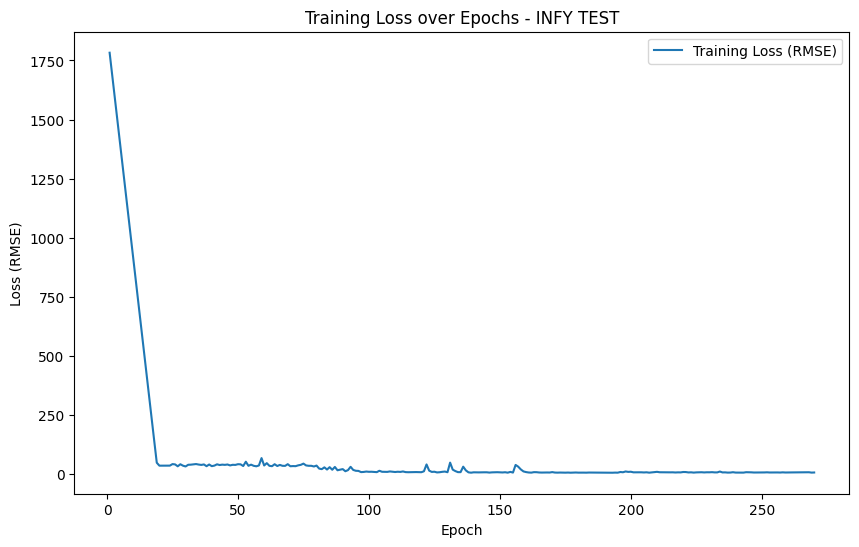

In [282]:
torch.save(model.state_dict(), "LSTM_MODEL/INFY_Test_model.pt")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 270 + 1), training_loss, label="Training Loss (RMSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss (RMSE)")
plt.title("Training Loss over Epochs - INFY TEST")
plt.legend()
plt.show()



e:\Projects\ML-Fall-24-Project\v_ml_env\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
e:\Projects\ML-Fall-24-Project\v_ml_env\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([22, 1])) that is different to the input size (torch.Size([22])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Val Loss: 131.1729
Predictions saved to 'predictions.csv'.


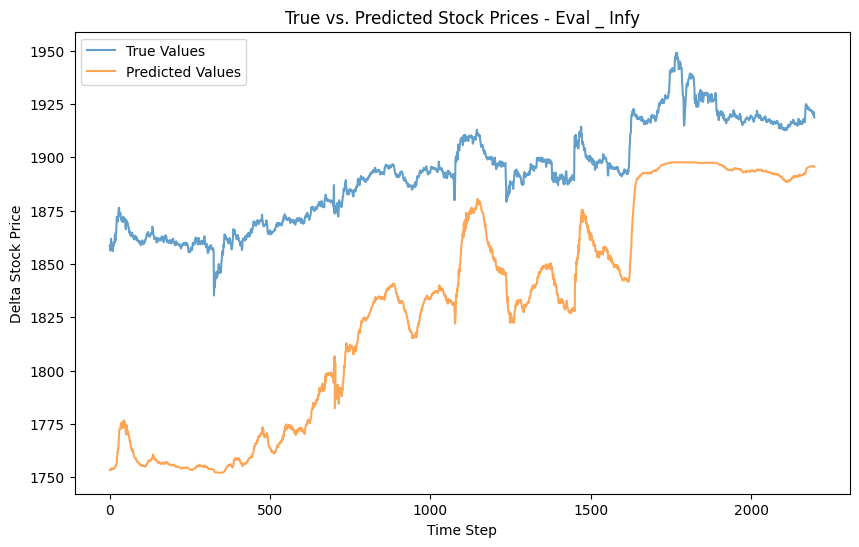

In [283]:
# %% Evaluation and Predictions
csv_path = 'Test_Dataset/INFY_DATA_TEST.csv'
target_col = 'Target'  # Replace with your actual target column name
preprocessor = TestDataLoaderPreprocessor(csv_path, target_col, test_size=0.0, batch_size=32, window_size=50)
test_data, temp, input_size = preprocessor.load_and_preprocess()

model.eval()  # Set model to evaluation mode
predictions = []
true_values = []

with torch.no_grad():
    for data, target in test_data:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output.squeeze(), target)
        rmse_loss = torch.sqrt(loss)
        val_loss += rmse_loss.item()
        predictions.append(output.squeeze().cpu().numpy())
        true_values.append(target.cpu().numpy())
    avg_val_loss = val_loss / len(test_loader)
    print(f"Val Loss: {avg_val_loss:.4f}")
# Flatten predictions and true values
predictions = np.concatenate(predictions).flatten()
true_values = np.concatenate(true_values).flatten()

# Save predictions to CSV
results_df = pd.DataFrame({
    "True": true_values,
    "Predicted": predictions
})
results_df.to_csv("TEST_INFY_predictions.csv", index=False)
print("Predictions saved to 'predictions.csv'.")

# Plot true vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(true_values, label="True Values", alpha=0.7)
plt.plot(predictions, label="Predicted Values", alpha=0.7)
plt.xlabel("Time Step")
plt.ylabel("Delta Stock Price")
plt.title("True vs. Predicted Stock Prices - Eval _ Infy")
plt.legend()
plt.show()

In [ ]:
# Improved LSTM Model
class ImprovedStockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(ImprovedStockLSTM, self).__init__()
        
        self.lstm = nn.LSTM(
            input_size, 
            hidden_size, 
            num_layers, 
            batch_first=True, 
            dropout=0.2  # Add dropout between LSTM layers
        )
        
        self.fc1 = nn.Linear(hidden_size, 32)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(32, output_size)
    
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        last_time_step = lstm_out[:, -1, :]
        
        x = self.fc1(last_time_step)
        x = self.relu(x)
        x = self.dropout(x)
        out = self.fc2(x)
        
        return out